In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import re
import os

In [2]:
file_path = 'all_house_data.csv'

#house_data = pd.read_csv('house_data.csv',index_col = 0)
house_data_raw = pd.read_csv(file_path,encoding='utf8')

In [3]:
house_data_raw.describe()

,Antal rum,Begärt pris,Biarea,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Prisutveckling,Tomtarea,address,coordinate,id,map_url,price,sale_date,type,url,Avgift/månad,Förening
count,43183,33939,35995,42690,39118,35051,36897,39635,37919,43489,43491,43475,43440,43411,43344,42661,35576,19786,16804
unique,275,5861,1930,1921,5525,17401,19399,18411,22873,36223,38035,24067,1784,2549,3410,17629,28865,8685,6643
top,2 rum,Avgift/månad,Begärt pris,Boarea,1968,3 600 kr/år,\n,\n,\n,address,https://maps.googleapis.com/maps/api/js?librar...,https://maps.googleapis.com/maps/api/js?librar...,https://maps.googleapis.com/maps/api/js?librar...,bostadsratt,bostadsratt,bostadsratt,url,Biarea,Tomtarea
freq,10422,542,540,737,763,828,1029,2899,2001,470,2250,16563,23026,1395,10381,14332,470,309,362


In [4]:
house_data_raw.head()

,Antal rum,Begärt pris,Biarea,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Prisutveckling,Tomtarea,address,coordinate,id,map_url,price,sale_date,type,url,Avgift/månad,Förening
0,5 rum,1 395 000 kr,20 m2,168 m2,1920,21 518 kr/år,9 018 kr/m2,\n\n +120 000 kr (+9 %)\n,707 m2,Dalviksgatan 6,"[58.41833602158281, 14.173516000689672]",944890.0,https://maps.googleapis.com/maps/api/js?librar...,1515000.0,Såld 2019-02-10,villa,/salda/villa-5rum-tibro-tibro-kommun-dalviksga...,NaN,NaN
1,10 rum,1 295 000 kr,170 m2,175 m2,1912,57 949 kr/år,5 714 kr/m2,\n\n -295 000 kr (-23 %)\n,1 742 m2,Mellbyvägen 138,"[58.1423480849156, 12.581077812236193]",944821.0,https://maps.googleapis.com/maps/api/js?librar...,1000000.0,Såld 2019-02-09,villa,/salda/villa-10rum-stora-mellby-alingsas-kommu...,NaN,NaN
2,4 rum,1 595 000 kr,32 m2,124 m2,1985,29 252 kr/år,14 516 kr/m2,\n\n +205 000 kr (+13 %)\n,776 m2,Åvägen 5,"[57.59336826715258, 12.875525104278504]",944820.0,https://maps.googleapis.com/maps/api/js?librar...,1800000.0,Såld 2019-02-09,villa,/salda/villa-4rum-kinnarumma-boras-kommun-avag...,NaN,NaN
3,4 rum,4 300 000 kr,28 m2,113 m2,1983,23 960 kr/år,41 593 kr/m2,\n\n +400 000 kr (+9 %)\n,"428,5 m2",Gamla Tingstadsgatan 34A,"[57.729935889695675, 11.975547588656331]",944836.0,https://maps.googleapis.com/maps/api/js?librar...,4700000.0,Såld 2019-02-09,radhus,/salda/radhus-4rum-brunnsbo-goteborgs-kommun-g...,NaN,NaN
4,3 rum,1 075 000 kr,NaN,"74,5 m2",0,4 308 kr/år,14 430 kr/m2,\n,NaN,Nygatan 20A,"[58.38360603922884, 12.325171522845999]",944876.0,https://maps.googleapis.com/maps/api/js?librar...,1075000.0,Såld 2019-02-09,bostadsratt,/salda/bostadsratt-3rum-nordstan-vanersborgs-k...,4 364 kr/mån,NaN


In [5]:
regexp_parentisis = re.compile('\(.*\)')

def clean_strings(cell):
    
    if not isinstance(cell,str):
        return cell
    
    s = cell
    s = s.replace('m2','')
    s = s.replace('kr','')
    s = s.replace('rum','')
    s = s.replace('\n','')
    s = s.replace('/','')
    s = s.replace('år','')
    s = s.replace(',','.')
    s = s.replace('Såld ','')
    s = s.replace('mån','')
    
    
    s = regexp_parentisis.sub('',s)
    
    return s
    
    

In [6]:
house_data = house_data_raw.applymap(clean_strings)

In [7]:
house_data.head()

,Antal rum,Begärt pris,Biarea,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Prisutveckling,Tomtarea,address,coordinate,id,map_url,price,sale_date,type,url,Avgift/månad,Förening
0,5,1 395 000,20,168,1920,21 518,9 018,+120 000,707,Dalviksgatan 6,[58.41833602158281. 14.173516000689672],944890.0,https:maps.googleapis.commapsapijs?libraries=g...,1515000.0,2019-02-10,villa,saldavilla-5-tibro-tibro-kommun-dalviksgatan-6...,NaN,NaN
1,10,1 295 000,170,175,1912,57 949,5 714,-295 000,1 742,Mellbyvägen 138,[58.1423480849156. 12.581077812236193],944821.0,https:maps.googleapis.commapsapijs?libraries=g...,1000000.0,2019-02-09,villa,saldavilla-10-stora-mellby-alingsas-kommun-mel...,NaN,NaN
2,4,1 595 000,32,124,1985,29 252,14 516,+205 000,776,Åvägen 5,[57.59336826715258. 12.875525104278504],944820.0,https:maps.googleapis.commapsapijs?libraries=g...,1800000.0,2019-02-09,villa,saldavilla-4-kinnama-boras-kommun-avagen-5-944820,NaN,NaN
3,4,4 300 000,28,113,1983,23 960,41 593,+400 000,428.5,Gamla Tingstadsgatan 34A,[57.729935889695675. 11.975547588656331],944836.0,https:maps.googleapis.commapsapijs?libraries=g...,4700000.0,2019-02-09,radhus,saldaradhus-4-brunnsbo-goteborgs-kommun-gamla-...,NaN,NaN
4,3,1 075 000,NaN,74.5,0,4 308,14 430,,NaN,Nygatan 20A,[58.38360603922884. 12.325171522845999],944876.0,https:maps.googleapis.commapsapijs?libraries=g...,1075000.0,2019-02-09,bostadsratt,saldabostadsratt-3-nordstan-vanersborgs-kommun...,4 364,NaN


In [8]:
numeric_columns = ['Antal rum','Begärt pris','Biarea','Boarea','Byggår','Driftskostnad','Pris per kvadratmeter','Prisutveckling','Tomtarea','price','Avgift/månad']
house_data[numeric_columns]

,Antal rum,Begärt pris,Biarea,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Prisutveckling,Tomtarea,price,Avgift/månad
0,5,1 395 000,20,168,1920,21 518,9 018,+120 000,707,1515000.0,NaN
1,10,1 295 000,170,175,1912,57 949,5 714,-295 000,1 742,1000000.0,NaN
2,4,1 595 000,32,124,1985,29 252,14 516,+205 000,776,1800000.0,NaN
3,4,4 300 000,28,113,1983,23 960,41 593,+400 000,428.5,4700000.0,NaN
4,3,1 075 000,NaN,74.5,0,4 308,14 430,,NaN,1075000.0,4 364
5,1,1 395 000,NaN,30.9,1973,2 700,46 926,+55 000,NaN,1450000.0,2 076
6,6,4 500 000,NaN,140,1949,35 980,33 643,+210 000,1 178,4710000.0,NaN
7,2,3 250 000,NaN,60.4,1969,1 320,57 947,+250 000,NaN,3500000.0,2 744
8,3,2 150 000,NaN,71,1963,7 063,30 986,+50 000,NaN,2200000.0,4 770
9,3,5 575 000,NaN,108,1930,7 600,58 333,+725 000,NaN,6300000.0,3 340


In [9]:
def remove_whitespace(cell):
    
    if not isinstance(cell,str):
        return cell
    
    s = cell.replace(' ','')
    s = cell.replace('+','')
    
    return s
    

def to_number(cell):
    
    if not isinstance(cell,str):
        return cell
    
    try:
        value = float(cell.replace(' ',''))
    except:
        return None
    else:
        return value
    

In [10]:
house_data[numeric_columns] = house_data[numeric_columns].applymap(remove_whitespace)

In [11]:
house_data[numeric_columns] = house_data[numeric_columns].applymap(to_number)

In [12]:
date_regexp = re.compile('(\d\d\d\d-\d\d-\d\d)')
def find_date(date_string):
    
    if not isinstance(date_string,str):
        return None
    
    else:
        result = date_regexp.search(date_string)
        if result:
            return result.group(1)
        else:
            return None


In [13]:
house_data['sale_date'] = house_data['sale_date'].apply(func = find_date)

In [14]:
musts = ['Boarea','Pris per kvadratmeter','price']

mask = house_data[musts].notnull().all(axis = 1)
house_data = house_data.loc[mask]
house_data.fillna(0,inplace = True)

In [15]:
house_data.describe()

,Antal rum,Begärt pris,Biarea,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Prisutveckling,Tomtarea,price,Avgift/månad
count,8.879000e+03,8.879000e+03,8.879000e+03,8879.000000,8.879000e+03,8879.000000,8879.000000,8.879000e+03,8.879000e+03,8.879000e+03,8879.000000
mean,9.475229e+03,2.280996e+06,1.509656e+04,89.999549,6.600648e+07,13316.149229,32674.364343,1.649830e+05,1.075770e+04,2.492280e+06,2421.630679
std,2.286370e+05,1.535265e+06,2.326997e+05,68.287920,3.581928e+09,14431.768706,39986.840360,2.782235e+05,2.401532e+05,1.578576e+06,2122.126465
min,0.000000e+00,0.000000e+00,-5.500000e+05,17.500000,0.000000e+00,0.000000,46.000000,-1.223880e+07,0.000000e+00,8.000000e+00,0.000000
25%,2.000000e+00,1.200000e+06,0.000000e+00,58.500000,1.936000e+03,3000.000000,16667.000000,0.000000e+00,0.000000e+00,1.425000e+06,0.000000
50%,3.000000e+00,1.995000e+06,0.000000e+00,78.000000,1.962000e+03,5235.000000,28889.000000,1.150000e+05,0.000000e+00,2.280000e+06,2837.000000
75%,5.000000e+00,2.990000e+06,8.000000e+00,111.200000,1.980000e+03,26459.000000,43166.000000,3.050000e+05,7.054000e+02,3.250000e+06,4109.000000
max,1.050000e+07,2.100000e+07,7.650000e+06,3726.000000,1.959198e+11,75800.000000,929623.000000,9.750000e+05,1.075000e+07,2.100000e+07,9174.000000


In [16]:
house_data['Antal rum'].unique()

array([5.000e+00, 1.000e+01, 4.000e+00, 3.000e+00, 1.000e+00, 6.000e+00,
       2.000e+00, 8.000e+00, 1.100e+01, 4.500e+00, 1.500e+00, 3.500e+00,
       7.000e+00, 2.500e+00, 9.000e+00, 0.000e+00, 5.500e+00, 1.800e+06,
       2.895e+06, 6.500e+05, 2.995e+06, 1.295e+06, 1.475e+06, 6.150e+06,
       1.975e+06, 2.980e+06, 1.300e+01, 5.495e+06, 9.150e+06, 2.385e+06,
       1.750e+06, 4.150e+06, 3.750e+06, 1.050e+07, 1.745e+06, 6.500e+06,
       2.495e+06, 3.975e+06, 6.995e+06])

In [17]:
house_data[numeric_columns] = house_data[numeric_columns].astype(float)

In [18]:
house_data['sale_date'] = pd.to_datetime(house_data['sale_date'])

In [19]:
price_max = house_data['price'].quantile(0.9999)
price_min = house_data['price'].quantile(0.0001)

price_m2_max = house_data['Pris per kvadratmeter'].quantile(0.995)
price_m2_min = house_data['Pris per kvadratmeter'].quantile(0.001)


mask = ((house_data['price'] > price_min) & (house_data['price'] < price_max) &
       (house_data['Pris per kvadratmeter'] > price_m2_min) & (house_data['Pris per kvadratmeter'] < price_m2_max)
       )
house_data_clean = house_data.loc[mask].copy()

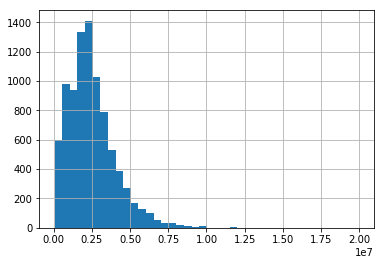

In [20]:
fig,ax = plt.subplots()
house_data_clean['price'].hist(bins = 40,ax = ax)

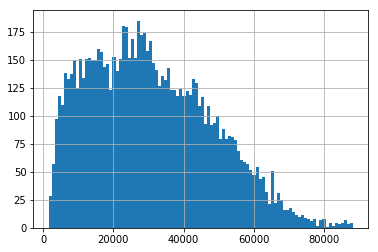

In [21]:
fig,ax = plt.subplots()
house_data_clean['Pris per kvadratmeter'].hist(bins = 100,ax = ax)

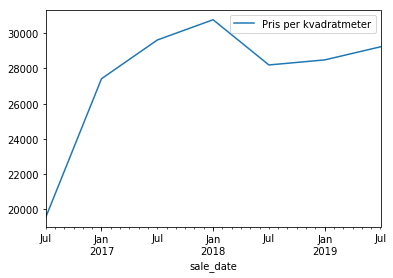

In [22]:
fig,ax = plt.subplots()
#mask = house_data['Pris per kvadratmeter'] < 70000
house_data_ = house_data_clean.set_index('sale_date')

house_data_.resample('6M').median().plot(y = 'Pris per kvadratmeter',ax = ax,alpha=1)

In [23]:
name,ext = os.path.splitext(file_path)
new_name = '%s_clean_no_coordinates%s' % (name,ext)
house_data_clean.to_csv(new_name,index = False)

In [24]:
regexp_coordinates = re.compile('\[(.*)\,(.*)\]')
def get_lat_lon(coordinate_string):

    result = regexp_coordinates.search(coordinate_string)
    if not result:
        lat = None
        lon = None
    else:
        lat = float(result.group(1))
        lon = float(result.group(2))

    s = pd.Series()
    s['lat'] = lat
    s['lon'] = lon

    return s

In [25]:
house_data_clean.describe()

,Antal rum,Begärt pris,Biarea,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Prisutveckling,Tomtarea,price,Avgift/månad
count,8825.000000,8.825000e+03,8.825000e+03,8825.000000,8.825000e+03,8825.000000,8825.000000,8.825000e+03,8825.000000,8.825000e+03,8825.000000
mean,3.452918,2.280384e+06,1.442855e+04,88.076487,6.640818e+07,13364.953541,30731.441473,1.669312e+05,650.150878,2.493654e+06,2430.452329
std,1.703441,1.502632e+06,2.312300e+05,40.582852,3.592868e+09,14439.199592,17301.263787,2.440966e+05,3620.898376,1.552425e+06,2121.961437
min,0.000000,0.000000e+00,0.000000e+00,17.500000,0.000000e+00,0.000000,1558.000000,-4.350000e+06,0.000000,7.250000e+04,0.000000
25%,2.000000,1.245000e+06,0.000000e+00,58.500000,1.937000e+03,3000.000000,16667.000000,0.000000e+00,0.000000,1.450000e+06,0.000000
50%,3.000000,1.995000e+06,0.000000e+00,78.000000,1.962000e+03,5280.000000,28788.000000,1.150000e+05,0.000000,2.280000e+06,2856.000000
75%,5.000000,2.990000e+06,8.000000e+00,111.000000,1.980000e+03,26500.000000,42945.000000,3.050000e+05,698.000000,3.250000e+06,4115.000000
max,13.000000,1.997500e+07,7.650000e+06,424.000000,1.959198e+11,75800.000000,88235.000000,9.750000e+05,186355.000000,1.997500e+07,9174.000000


In [26]:
coordinates = house_data_clean['coordinate'].apply(func = get_lat_lon)
house_data_clean = pd.concat((house_data_clean,coordinates),axis = 1)

In [27]:
mask = (house_data_clean['lat'].notnull() & house_data_clean['lon'].notnull())
house_data_clean = house_data_clean.loc[mask]

In [28]:
name,ext = os.path.splitext(file_path)
new_name = '%s_clean%s' % (name,ext)

In [29]:
house_data_clean.to_csv(new_name,index = False)